Title: Bar Chart using Pandas
Slug: bar-chart-python-pandas
Summary: Create simple bar charts in Python using the Pandas library based on a tips dataset
Date: 2018-03-07 22:00  
Category: Data Visualizations
Subcategory: Pandas Plot
Tags: bar chart
Keywords: bar chart python pandas
Authors: Dan Friedman

#### Import Modules

In [20]:
import matplotlib.pyplot as plt
import pandas as pd
% matplotlib inline

#### Read in Tips Dataset from URL

This data contains logs of tips received by waiters and waittresses at a restaurant.

In [21]:
df_tips = pd.read_csv('https://raw.githubusercontent.com/mwaskom/seaborn-data/master/tips.csv')

#### Preview the Data

##### Preview the top 5 rows

In [22]:
df_tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


##### View the count of non-null values per colummn and data types

In [23]:
df_tips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
total_bill    244 non-null float64
tip           244 non-null float64
sex           244 non-null object
smoker        244 non-null object
day           244 non-null object
time          244 non-null object
size          244 non-null int64
dtypes: float64(2), int64(1), object(4)
memory usage: 13.4+ KB


#### Examine Gender Values of Tip Records

Bar charts are great at visualizing counts of categorical data. 

With this tips dataset, we have several categorical fields including *sex*, *smoker*, *day*, *time* and *size*.

##### Examine Data to be Passed into Plots

First, we can call the `value_counts` method on the *sex* (aka gender) field to see the count of unique values. 

In [24]:
df_tips['sex'].value_counts()

Male      157
Female     87
Name: sex, dtype: int64

The output above is a Pandas Series in which the index items are `Male` and `Female` and the values are the count of each index item in our original tips *sex* field.

In [25]:
df_tips['sex'].value_counts().index

Index(['Male', 'Female'], dtype='object')

In [26]:
type(df_tips['sex'].value_counts())

pandas.core.series.Series

#### Visualize Count of People by Gender

We access the *sex* field, call the `value_counts` method to get a count of unique values, then call the `plot` method and pass in `bar` (for bar chart) to the `kind` argument.

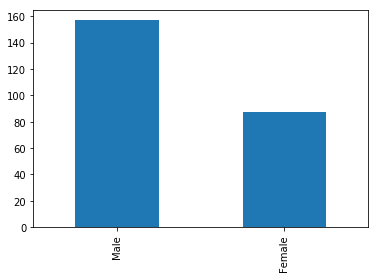

In [27]:
df_tips['sex'].value_counts().plot(kind='bar');

In our tips dataset, we have more records of tips for male waiters than female waitresses.

#### Visualize Count of Days for Recorded Tips

We access the *day* field, call the `value_counts` method to get a count of unique values, then call the `plot` method and pass in `bar` (for bar chart) to the `kind` argument.

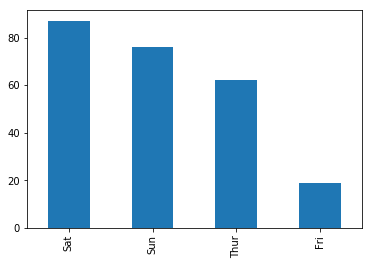

In [28]:
df_tips['day'].value_counts().plot(kind='bar');

Most of our tip records were on Saturday followed by Sunday. Only 4 days have recorded tips.

#### Examine Tip Values by Day

The main question I have on this dataset is: "On what day and time do people get tipped the most?" If I was a waiter, I'd purposely want to work the shifts in which tip amounts would be highest.

To answer this question, we need to perform a group by operation. Our process will involve the following steps:

- Split the data by *day*
- After the split by *day*, split the data by *time*
- For the *tip* field, compute the mean

##### A Simple Walk Through of a Group By with Sample Data

In [29]:
df_sample = df_tips.sample(3, random_state=1)

We now have a record of just 3 tip values.

In [30]:
df_sample

,total_bill,tip,sex,smoker,day,time,size
67,3.07,1.00,Female,Yes,Sat,Dinner,1
243,18.78,3.00,Female,No,Thur,Dinner,2
206,26.59,3.41,Male,Yes,Sat,Dinner,3


If we split the data by *day* and by *time*, we'd get 2 records of Dinner on Saturday and 1 record of Dinner on Thursday. 

For our 2 records of Dinner on Saturday, we can compute the average tip amount by the operation ($1.00 + $3.41)/2 which equals approximately $2.20. 

For our 1 record of Dinner on Thursday, our average tip amount is simply $3.00.

##### Group By Operation on our Sample Data

We call the `groupby` method on our `df_sample` dataframe, grouping by the *day* and *time* fields, and calculating the mean (aka average) tip amount in dollars.  

In [31]:
df_sample.groupby(by=['day', 'time'])['tip'].mean()

day   time  
Sat   Dinner    2.205
Thur  Dinner    3.000
Name: tip, dtype: float64

The output is a Pandas Series.

In [32]:
type(df_sample.groupby(by=['day', 'time'])['tip'].mean())

pandas.core.series.Series

Group By Operation on Entire Tips Dataset

We perform the same operations on our entire tips dataset.

In [33]:
df_tips.groupby(by=['day', 'time'])['tip'].mean()

day   time  
Fri   Dinner    2.940000
      Lunch     2.382857
Sat   Dinner    2.993103
Sun   Dinner    3.255132
Thur  Dinner    3.000000
      Lunch     2.767705
Name: tip, dtype: float64

##### Visualize Average Tip Amounts Broken Down into Day and Time

We take the output of our groupby operation, call the `sort_values` method to output tip amount values from highest to lowest (descending order), then call the Pandas `plot` method and pass in `bar` (for bar chart) to the `kind` argument.

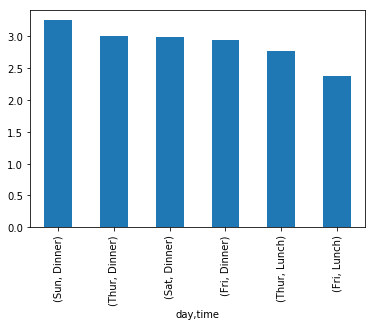

In [34]:
df_tips.groupby(by=['day', 'time'])['tip'].mean().sort_values(ascending=False).plot(kind='bar');

The bar graph illustrates that dinner on Sunday has the highest average tip amounts.

#### Examine Number of Tips Given by Day and Time

##### Group By Operation

Different than the groupby operations above, below we call the`size` method to count the number of records by *day* and *time*.

In [35]:
df_tips.groupby(by=['day', 'time']).size()

day   time  
Fri   Dinner    12
      Lunch      7
Sat   Dinner    87
Sun   Dinner    76
Thur  Dinner     1
      Lunch     61
dtype: int64

##### Visualize Number of Tips Given by Day and Time

To visualize the output above, we call the`sort_values` method to output the count of tip records from highest to lowest (descending order), then call the Pandas `plot` method and pass in `bar` (for bar chart) to the `kind` argument.

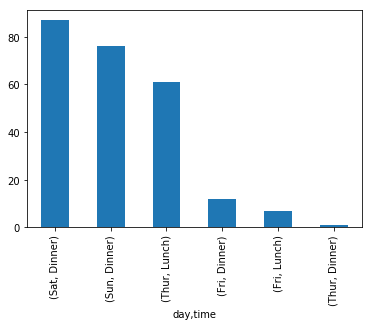

In [36]:
df_tips.groupby(by=['day', 'time']).size().sort_values(ascending=False).plot(kind='bar');

This bar graph illustrates the most records for tips are for dinner on Saturday followed by dinner on Sunday.